In [1]:
import numpy as np
import pandas as pd

texture_data = pd.read_csv('/home/tpuct/Documents/classification-data-19/disseminated/features.csv', header=None)
texture_data.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,19,20100226,0,187,169,0,0,0,0,...,0,0,0,0,0,0,419,399,419,400
1,0,19,20100226,0,188,169,1,0,0,0,...,0,0,0,0,0,0,418,398,418,399
2,0,19,20100226,0,189,169,2,0,0,0,...,0,0,0,0,0,0,417,397,417,398
3,0,19,20100226,0,190,169,3,0,0,0,...,0,0,0,0,0,0,416,396,416,397
4,0,19,20100226,0,191,169,4,0,0,0,...,0,0,0,0,0,0,415,395,415,396


In [2]:
X = texture_data.drop([0, 1, 2, 3, 4, 5], axis=1).as_matrix()
y = texture_data[0].as_matrix()

print(X.shape, y.shape)
print(X.dtype, y.dtype)
print(np.unique(y, return_counts=True))

(544288, 64) (544288,)
int64 int64
(array([0, 1]), array([484134,  60154]))


In [3]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=911)

X_train, X_test, y_train, y_test = [], [], [], []
for train_idx, test_idx in kf.split(X, y):
    X_train.append(X[train_idx])
    X_test.append(X[test_idx])
    y_train.append(y[train_idx])
    y_test.append(y[test_idx])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, precision_score, recall_score
from datetime import datetime

lr = LogisticRegression(penalty='l2', class_weight={0:1.00, 1:8.05}, random_state=241)
c_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

log_loss_means, precision_means, recall_means = [], [], []
time_spent = []
for c_value in c_values:
    lr.set_params(C=c_value)
    
    log_loss_folds = np.zeros((len(X_train),))
    precision_folds = np.zeros((len(X_train),))
    recall_folds = np.zeros((len(X_train),))
    
    time_start = datetime.now()
    for i in range(len(X_train)):
        lr.fit(X_train[i], y_train[i])
        y_pred = lr.predict(X_test[i])
        
        # Calculate scores
        log_loss_folds[i] = log_loss(y_test[i], y_pred)
        precision_folds = precision_score(y_test[i], y_pred)
        recall_folds = recall_score(y_test[i], y_pred)
    
    log_loss_means.append(np.mean(log_loss_folds))
    precision_means.append(np.mean(precision_folds))
    recall_means.append(np.mean(recall_folds))
    time_spent.append(datetime.now() - time_start)

In [5]:
for i in range(len(c_values)):
    print('C value = {0}, Logloss = {1}, Precision = {2:.2f}, Recall = {3:.2f}, Time = {4}'
          .format(c_values[i], log_loss_means[i], precision_means[i], recall_means[i], time_spent[i]))

C value = 0.001, Logloss = 0.8542727300375936, Precision = 0.83, Recall = 0.98, Time = 0:01:13.094521
C value = 0.01, Logloss = 0.8533208647708561, Precision = 0.83, Recall = 0.98, Time = 0:01:58.751059
C value = 0.1, Logloss = 0.8523689912492138, Precision = 0.83, Recall = 0.98, Time = 0:02:18.590267
C value = 1.0, Logloss = 0.8527497520978523, Precision = 0.83, Recall = 0.98, Time = 0:02:15.197832
C value = 10.0, Logloss = 0.8523055455224562, Precision = 0.83, Recall = 0.98, Time = 0:02:31.945355
C value = 100.0, Logloss = 0.8523689944904742, Precision = 0.83, Recall = 0.98, Time = 0:02:23.880626
C value = 1000.0, Logloss = 0.8529401165374082, Precision = 0.83, Recall = 0.98, Time = 0:02:05.538079


In [6]:
# Train Logistic Regression with optimal parameters on the all training data
optimal_c_value = c_values[np.argmin(np.array(log_loss_means))]

lr.set_params(C=optimal_c_value)
lr.fit(X, y)

LogisticRegression(C=10.0, class_weight={0: 1.0, 1: 8.05}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=241,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
test_data = pd.read_csv('/home/tpuct/Documents/test-data/disseminated-19/features.csv', header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,19,20100226,0,155,122,0,0,0,0,...,0,0,0,0,0,0,419,399,419,400
1,0,19,20100226,0,156,122,1,0,0,0,...,0,0,0,0,0,0,418,398,418,399
2,0,19,20100226,0,157,122,2,0,0,0,...,0,0,0,0,0,0,417,397,417,398
3,0,19,20100226,0,158,122,3,0,0,0,...,0,0,0,0,0,0,416,396,416,397
4,0,19,20100226,0,159,122,4,0,0,0,...,0,0,0,0,0,0,415,395,415,396


In [16]:
X_testing = test_data.drop([0, 1, 2, 3, 4, 5], axis=1).as_matrix()
y_testing = test_data[0].as_matrix()

print(X_testing.shape, y_testing.shape)
print(X_testing.dtype, y_testing.dtype)
print(np.unique(y_testing, return_counts=True))

(343468, 64) (343468,)
int64 int64
(array([0, 1]), array([327534,  15934]))


In [17]:
y_testing_pred = lr.predict(X_testing)
y_testing_proba = lr.predict_proba(X_testing)[:, 1]

In [18]:
# Calculate metrics
from sklearn.metrics import f1_score

precision_testing = precision_score(y_testing, y_testing_pred)
recall_testing = recall_score(y_testing, y_testing_pred)
f1_testing = f1_score(y_testing, y_testing_pred)

print('Metrics calculated on the test data:\nPrecision = {0:.2f}\nRecall = {1:.2f}\nF1 = {2:.2f}'
      .format(precision_testing, recall_testing, f1_testing))

Metrics calculated on the test data:
Precision = 0.18
Recall = 0.93
F1 = 0.30


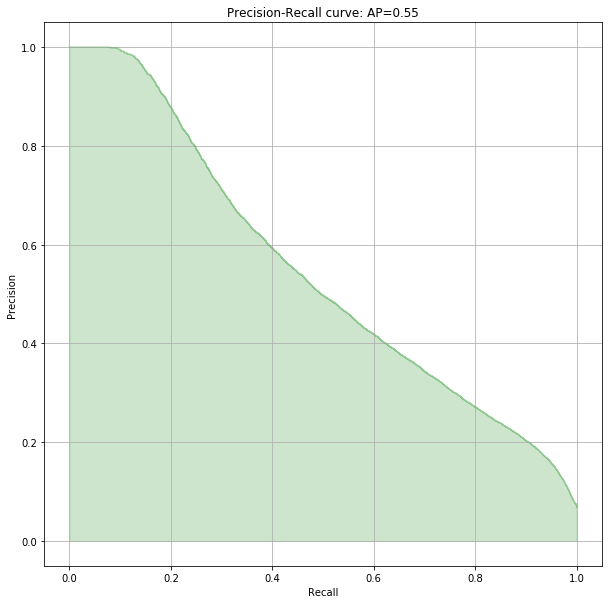

In [19]:
# Create PR-curve
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt

%matplotlib inline

y_testing_average_precision = average_precision_score(y_testing, y_testing_proba)
y_testing_precision, y_testing_recall, _ = precision_recall_curve(y_testing, y_testing_proba)

plt.figure(figsize=(10, 10))
plt.plot(y_testing_recall, y_testing_precision, color='g', alpha=0.2)
plt.fill_between(y_testing_recall, y_testing_precision, alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(y_testing_average_precision))
plt.grid(True)

In [20]:
# Tramsform test data - remove all the features and remain only class label and meta information
test_data = test_data[[1, 2, 3, 4, 5]].as_matrix()

In [21]:
import os

from dicom_data_working import extract_dicom_slices_from_folder
from dicom_data_working import convert_slices_to_preset
from highlighting import highlight_probas_on_preset_slice

patient_id = 19
survey_id = 20100226
dicom_dir_path = '/home/tpuct/Documents/test-data/disseminated-19/{0}/{1}/dicom-data/'.format(patient_id, survey_id)

dicom_slices = extract_dicom_slices_from_folder(dicom_dir_path)
preset_slices = convert_slices_to_preset(dicom_slices, 2)

highlighted_images = []
for i, slc in enumerate(preset_slices):
    patient_idx = np.where(test_data[:, 0] == patient_id)
    patient_data = test_data[patient_idx]
    patient_proba = y_testing_proba[patient_idx]
    
    survey_idx = np.where(patient_data[:, 1] == survey_id)
    survey_data = patient_data[survey_idx]
    survey_proba = patient_proba[survey_idx]
    
    slice_idx = np.where(survey_data[:, 2] == i)
    slice_data = survey_data[slice_idx]
    slice_proba = survey_proba[slice_idx]
    
    highlighted_img = highlight_probas_on_preset_slice(slc, slice_proba, slice_data[:, 3:])
    
    highlighted_img.save('./{0}_{1}_{2}.png'.format(patient_id, survey_id, i))
    highlighted_images.append(highlighted_img)

(-0.5, 511.5, 511.5, -0.5)

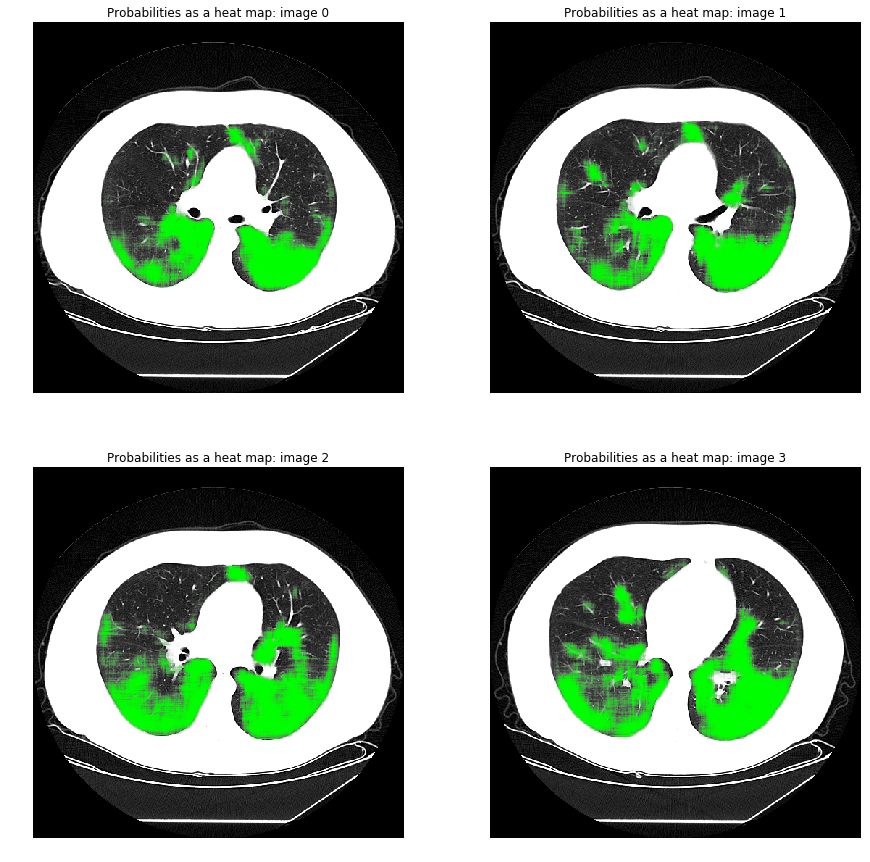

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].imshow(highlighted_images[0])
axs[0, 0].set_title('Probabilities as a heat map: image 0')
axs[0, 0].axis('off')

axs[0, 1].imshow(highlighted_images[1])
axs[0, 1].set_title('Probabilities as a heat map: image 1')
axs[0, 1].axis('off')

axs[1, 0].imshow(highlighted_images[2])
axs[1, 0].set_title('Probabilities as a heat map: image 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(highlighted_images[3])
axs[1, 1].set_title('Probabilities as a heat map: image 3')
axs[1, 1].axis('off')